In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO)

## 1. Load expression data

The `transformation` value can be one of `"none"`, `"sqrt"` or `"log"`, which determines how the expression data should be transformed in order to reduce outlier influence.

In [3]:
data_path: str = "data/Athaliana.csv"
transformation: str = "log"

In [4]:
# Parameters
data_path = "data/processed_data/flower_development.csv"
transformation = "sqrt"


In [5]:
from my_gatai import Expression_data

expression_data = Expression_data.from_csv(data_path, 
                                           transformation=transformation)
expression_data.full

,Phylostratum,GeneID,0d,1d,1.5d,2d,2.5d,3d,3.5d
0,0.629125,at1g01010,18.696156,19.210598,18.808705,19.251766,19.590672,19.283186,19.326648
1,0.629125,at1g01020,69.945086,69.450019,67.477939,68.277205,68.870457,67.643630,67.065682
2,0.629125,at1g01040,95.806506,94.605920,94.862310,95.231359,91.687785,92.113375,90.464083
3,0.629125,at1g01050,114.515897,113.038000,112.347616,111.796414,109.248876,109.423211,109.129210
4,0.711680,at1g01060,42.951582,45.533775,42.946735,48.686965,42.082523,43.081593,45.252214
...,...,...,...,...,...,...,...,...,...
23240,0.915079,atmg01130,13.427803,13.026044,12.855557,13.226968,13.363204,13.228136,12.785334
23241,0.629125,atmg01360,49.052793,48.247400,49.260552,48.580143,50.174857,49.587341,47.444389
23242,0.972467,atmg01370,53.948433,48.472412,47.057956,47.342742,48.492482,49.311849,49.617690
23243,0.972467,atmg01400,8.204685,8.371647,8.130287,8.456361,7.977598,8.101373,8.006815


In [6]:
expression_data.p_matrix

,0d,1d,1.5d,2d,2.5d,3d,3.5d
0,0.000014,0.000014,0.000014,0.000015,0.000015,0.000015,0.000015
1,0.000053,0.000052,0.000051,0.000051,0.000052,0.000051,0.000051
2,0.000072,0.000071,0.000072,0.000072,0.000069,0.000069,0.000068
3,0.000086,0.000085,0.000085,0.000084,0.000082,0.000083,0.000082
4,0.000037,0.000039,0.000037,0.000042,0.000036,0.000037,0.000039
...,...,...,...,...,...,...,...
23240,0.000015,0.000014,0.000014,0.000015,0.000015,0.000015,0.000014
23241,0.000037,0.000036,0.000037,0.000037,0.000038,0.000037,0.000036
23242,0.000063,0.000056,0.000055,0.000055,0.000057,0.000058,0.000058
23243,0.000010,0.000010,0.000009,0.000010,0.000009,0.000009,0.000009


In [7]:
expression_data.tai

0d      0.676534
1d      0.676505
1.5d    0.676489
2d      0.676505
2.5d    0.676563
3d      0.676525
3.5d    0.676500
dtype: float64

### 1.1 Compute TAI value

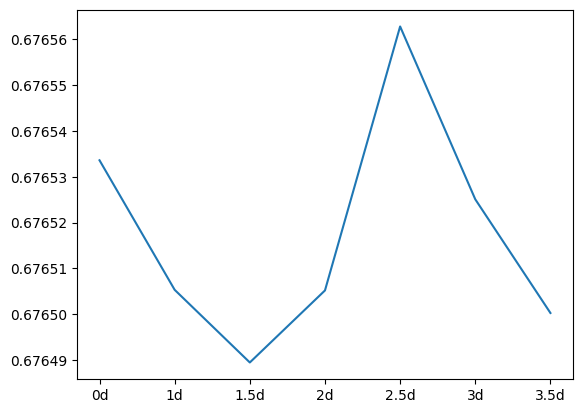

In [8]:
import matplotlib.pyplot as plt

plt.plot(expression_data.tai)
plt.show()

## 2. Flatline test

### 2.1. Compute variance of TAI curve

In [9]:
import numpy as np
tai_var = np.var(expression_data.tai).item()
tai_var

5.355204306945335e-10

### 2.2. Compute permutation variance distribution

Permute the assigned gene ages between the genes to run the flat line test

In [10]:
from gatai.utils import comp_vars

num_permutations = 10000
permutation_comp_vars = comp_vars(expression_data, num_permutations)

Running permuations


  0%|                                                                                                                                                                                          | 0/10000 [00:00<?, ?it/s]

  2%|███▎                                                                                                                                                                          | 189/10000 [00:00<00:05, 1889.70it/s]

  4%|███████▌                                                                                                                                                                      | 433/10000 [00:00<00:04, 2213.15it/s]

  7%|████████████                                                                                                                                                                  | 690/10000 [00:00<00:03, 2372.90it/s]

  9%|████████████████▎                                                                                                                                                             | 939/10000 [00:00<00:03, 2416.89it/s]

 12%|████████████████████▋                                                                                                                                                        | 1196/10000 [00:00<00:03, 2470.64it/s]

 14%|█████████████████████████                                                                                                                                                    | 1446/10000 [00:00<00:03, 2478.92it/s]

 17%|█████████████████████████████▎                                                                                                                                               | 1694/10000 [00:00<00:03, 2294.12it/s]

 19%|█████████████████████████████████▋                                                                                                                                           | 1947/10000 [00:00<00:03, 2364.21it/s]

 22%|█████████████████████████████████████▉                                                                                                                                       | 2195/10000 [00:00<00:03, 2398.59it/s]

 25%|██████████████████████████████████████████▍                                                                                                                                  | 2451/10000 [00:01<00:03, 2446.19it/s]

 27%|██████████████████████████████████████████████▊                                                                                                                              | 2704/10000 [00:01<00:02, 2468.56it/s]

 30%|███████████████████████████████████████████████████                                                                                                                          | 2954/10000 [00:01<00:02, 2477.68it/s]

 32%|███████████████████████████████████████████████████████▍                                                                                                                     | 3206/10000 [00:01<00:02, 2488.35it/s]

 35%|███████████████████████████████████████████████████████████▊                                                                                                                 | 3456/10000 [00:01<00:02, 2474.16it/s]

 37%|████████████████████████████████████████████████████████████████                                                                                                             | 3705/10000 [00:01<00:02, 2477.69it/s]

 40%|████████████████████████████████████████████████████████████████████▍                                                                                                        | 3953/10000 [00:01<00:02, 2465.81it/s]

 42%|████████████████████████████████████████████████████████████████████████▋                                                                                                    | 4200/10000 [00:01<00:02, 2463.10it/s]

 44%|████████████████████████████████████████████████████████████████████████████▉                                                                                                | 4448/10000 [00:01<00:02, 2467.60it/s]

 47%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 4695/10000 [00:01<00:02, 2432.51it/s]

 49%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 4944/10000 [00:02<00:02, 2448.68it/s]

 52%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 5195/10000 [00:02<00:01, 2465.95it/s]

 54%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 5442/10000 [00:02<00:01, 2452.06it/s]

 57%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 5694/10000 [00:02<00:01, 2471.16it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 5946/10000 [00:02<00:01, 2484.80it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 6198/10000 [00:02<00:01, 2493.10it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 6450/10000 [00:02<00:01, 2499.56it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 6703/10000 [00:02<00:01, 2506.69it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 6956/10000 [00:02<00:01, 2510.86it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 7208/10000 [00:02<00:01, 2486.97it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 7457/10000 [00:03<00:01, 2469.90it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 7705/10000 [00:03<00:01, 2273.41it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 7949/10000 [00:03<00:00, 2317.53it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 8192/10000 [00:03<00:00, 2348.10it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 8445/10000 [00:03<00:00, 2399.17it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 8695/10000 [00:03<00:00, 2428.42it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 8939/10000 [00:03<00:00, 2428.43it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 9183/10000 [00:03<00:00, 2428.27it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 9435/10000 [00:03<00:00, 2455.27it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 9681/10000 [00:03<00:00, 2448.02it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 9927/10000 [00:04<00:00, 2430.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2431.19it/s]

### 2.3. Fit the random variances to a Gamma distribution and compute the p-value of the true TAI

In [11]:
from flatline import fit_gamma, p_value_function

# NOTE: the default fitting method used by scipy doesn't achieve a very good fit, so use "MM"
a, loc, scale = fit_gamma(permutation_comp_vars)
get_p_value = p_value_function(a, loc, scale)
print("Gamma fit params:", a, loc, scale)

Gamma fit params: 0.6557564903805214 1.6828359207166612e-10 1.034602549916629e-09


In [12]:
print("p-value of TAI:", get_p_value(tai_var))

p-value of TAI: 0.5083299611588685


### 2.4. Visually compare the random TAI variances against the true one

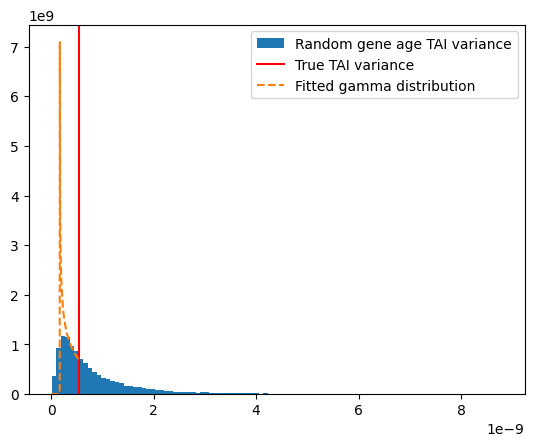

In [13]:
from scipy import stats
plt.hist(permutation_comp_vars, density=True, bins=100, label="Random gene age TAI variance")
plt.axvline(x=tai_var, label="True TAI variance", color="red")

x = np.linspace(0, tai_var, 200)
y = stats.gamma.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, y, label="Fitted gamma distribution", linestyle="dashed")

plt.legend()
plt.show()

## 3. Destroy TAI signal with GATAI

### 3.1 Run genetic algorithm to extract genes that break the pattern
Note that the transformation used for the expression data heavily influences the number of genes that get extracted, as well as the number of generations needed for convergence.

Also, with transformations applied, older genes are better represented

In [14]:
from my_gatai import get_extracted_genes

ga_genes = get_extracted_genes(expression_data, permutation_comp_vars)

gen	island	Num removed	Variance
0  	      	2          	1.44065 


10 	1     	526        	0.919306
10 	2     	225        	1.11691 
10 	3     	334        	1.10759 
10 	4     	459        	1.16341 




20 	1     	313        	1.07846 
20 	2     	506        	0.879276
20 	3     	604        	0.843757
20 	4     	544        	0.925926




30 	1     	694        	0.815023
30 	2     	838        	0.700955
30 	3     	555        	0.813429
30 	4     	786        	0.763542




40 	1     	785        	0.737155
40 	2     	733        	0.714016
40 	3     	784        	-0      
40 	4     	732        	0.702664




50 	1     	501        	-0      
50 	2     	864        	-0      
50 	3     	691        	-0      
50 	4     	715        	-0      




60 	1     	476        	-0      
60 	2     	485        	-0      
60 	3     	638        	-0      
60 	4     	581        	-0      




70 	1     	475        	-0      
70 	2     	445        	-0      
70 	3     	476        	-0      
70 	4     	492        	-0      




80 	1     	413        	-0      
80 	2     	429        	-0      
80 	3     	432        	-0      
80 	4     	446        	-0      




90 	1     	414        	-0      
90 	2     	392        	-0      
90 	3     	341        	-0      
90 	4     	370        	-0      




100	1     	341        	-0      
100	2     	367        	-0      
100	3     	372        	-0      
100	4     	324        	-0      




110	1     	312        	-0      
110	2     	316        	-0      
110	3     	335        	-0      
110	4     	366        	-0      




120	1     	275        	-0      
120	2     	238        	-0      
120	3     	291        	-0      
120	4     	289        	-0      




130	1     	243        	-0      
130	2     	255        	-0      
130	3     	224        	-0      
130	4     	282        	-0      




140	1     	269        	-0      
140	2     	238        	-0      
140	3     	163        	-0      
140	4     	211        	-0      




150	1     	208        	-0      
150	2     	225        	-0      
150	3     	223        	-0      
150	4     	156        	-0      




160	1     	144        	-0      
160	2     	182        	-0      
160	3     	147        	-0      
160	4     	220        	-0      




170	1     	192        	-0      
170	2     	142        	-0      
170	3     	138        	-0      
170	4     	138        	-0      




180	1     	129        	-0      
180	2     	135        	-0      
180	3     	121        	-0      
180	4     	106        	-0      




190	1     	96         	-0      
190	2     	118        	-0      
190	3     	130        	-0      
190	4     	100        	-0      




200	1     	94         	-0      
200	2     	95         	-0      
200	3     	108        	-0      
200	4     	91         	-0      




210	1     	85         	-0      
210	2     	86         	-0      
210	3     	84         	-0      
210	4     	90         	-0      




220	1     	85         	-0      
220	2     	82         	-0      
220	3     	82         	-0      
220	4     	78         	-0      




230	1     	69         	-0      
230	2     	82         	-0      
230	3     	81         	-0      
230	4     	75         	-0      




240	1     	73         	-0      
240	2     	45         	-0      
240	3     	77         	-0      
240	4     	78         	-0      




250	1     	46         	-0      
250	2     	42         	-0      
250	3     	41         	-0      
250	4     	41         	-0      




260	1     	38         	-0      
260	2     	38         	-0      
260	3     	36         	-0      
260	4     	39         	-0      




270	1     	37         	-0      
270	2     	34         	-0      
270	3     	38         	-0      
270	4     	36         	-0      




280	1     	35         	-0      
280	2     	32         	-0      
280	3     	37         	-0      
280	4     	35         	-0      




290	1     	34         	-0      
290	2     	31         	-0      
290	3     	32         	-0      
290	4     	35         	-0      




300	1     	33         	-0      
300	2     	29         	-0      
300	3     	31         	-0      
300	4     	32         	-0      




310	1     	31         	-0      
310	2     	29         	-0      
310	3     	29         	-0      
310	4     	30         	-0      




320	1     	30         	-0      
320	2     	29         	-0      
320	3     	29         	-0      
320	4     	29         	-0      




330	1     	27         	-0      
330	2     	29         	-0      
330	3     	29         	-0      
330	4     	26         	-0      




340	1     	26         	-0      
340	2     	26         	-0      
340	3     	29         	-0      
340	4     	29         	-0      




350	1     	24         	-0      
350	2     	26         	-0      
350	3     	26         	-0      
350	4     	29         	-0      




360	1     	24         	-0      
360	2     	24         	-0      
360	3     	26         	-0      
360	4     	26         	-0      




370	1     	24         	-0      
370	2     	24         	-0      
370	3     	24         	-0      
370	4     	26         	-0      




380	1     	24         	-0      
380	2     	24         	-0      
380	3     	24         	-0      
380	4     	24         	-0      




390	1     	24         	-0      
390	2     	24         	-0      
390	3     	24         	-0      
390	4     	24         	-0      




400	1     	24         	-0      
400	2     	24         	-0      
400	3     	24         	-0      
400	4     	24         	-0      




410	1     	24         	-0      
410	2     	24         	-0      
410	3     	24         	-0      
410	4     	23         	-0      




420	1     	23         	-0      
420	2     	24         	-0      
420	3     	24         	-0      
420	4     	23         	-0      




430	1     	23         	-0      
430	2     	23         	-0      
430	3     	24         	-0      
430	4     	23         	-0      




440	1     	23         	-0      
440	2     	23         	-0      
440	3     	23         	-0      
440	4     	23         	-0      




450	1     	23         	-0      
450	2     	23         	-0      
450	3     	23         	-0      
450	4     	23         	-0      




460	1     	23         	-0      
460	2     	23         	-0      
460	3     	23         	-0      
460	4     	23         	-0      




470	1     	23         	-0      
470	2     	23         	-0      
470	3     	23         	-0      
470	4     	23         	-0      




480	1     	23         	-0      
480	2     	23         	-0      
480	3     	23         	-0      
480	4     	23         	-0      




490	1     	23         	-0      
490	2     	23         	-0      
490	3     	23         	-0      
490	4     	23         	-0      




500	1     	23         	-0      
500	2     	23         	-0      
500	3     	23         	-0      
500	4     	23         	-0      




510	1     	23         	-0      
510	2     	23         	-0      
510	3     	23         	-0      
510	4     	23         	-0      




520	1     	23         	-0      
520	2     	23         	-0      
520	3     	23         	-0      
520	4     	23         	-0      




530	1     	23         	-0      
530	2     	23         	-0      
530	3     	23         	-0      
530	4     	23         	-0      




540	1     	23         	-0      
540	2     	23         	-0      
540	3     	23         	-0      
540	4     	23         	-0      




550	1     	23         	-0      
550	2     	23         	-0      
550	3     	23         	-0      
550	4     	23         	-0      




560	1     	23         	-0      
560	2     	23         	-0      
560	3     	23         	-0      
560	4     	23         	-0      




570	1     	23         	-0      
570	2     	23         	-0      
570	3     	23         	-0      
570	4     	23         	-0      




580	1     	23         	-0      
580	2     	23         	-0      
580	3     	23         	-0      
580	4     	23         	-0      




590	1     	23         	-0      
590	2     	23         	-0      
590	3     	23         	-0      
590	4     	23         	-0      




600	1     	23         	-0      
600	2     	23         	-0      
600	3     	23         	-0      
600	4     	23         	-0      




610	1     	23         	-0      
610	2     	23         	-0      
610	3     	23         	-0      
610	4     	23         	-0      




620	1     	23         	-0      
620	2     	23         	-0      
620	3     	23         	-0      
620	4     	23         	-0      




630	1     	23         	-0      
630	2     	23         	-0      
630	3     	23         	-0      
630	4     	23         	-0      




#### Genes extracted

In [15]:
len(ga_genes)

5

In [16]:
ga_genes

array(['at2g03570', 'at3g23450', 'at4g11211', 'at5g21020', 'at5g43070'],
      dtype=object)

### 3.2 Check variance of destroyed TAI and its new p-value

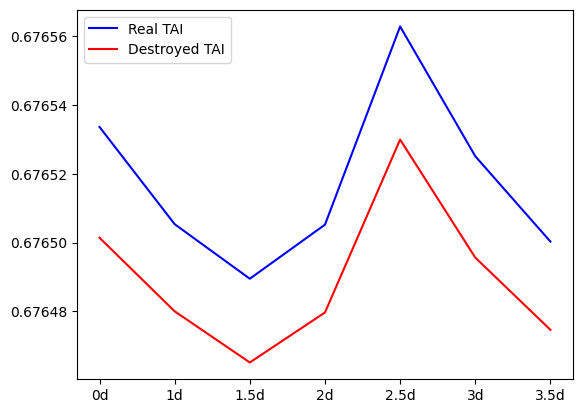

In [17]:
new_data = expression_data.remove_genes(ga_genes)
plt.plot(expression_data.tai, label="Real TAI", color="blue")
plt.plot(new_data.tai, label="Destroyed TAI", color="red")

plt.legend()
plt.show()

In [18]:
new_tai_var = np.var(new_data.tai).item()
print("destroyed TAI p-value:", get_p_value(new_tai_var))

destroyed TAI p-value: 0.6165828008612122


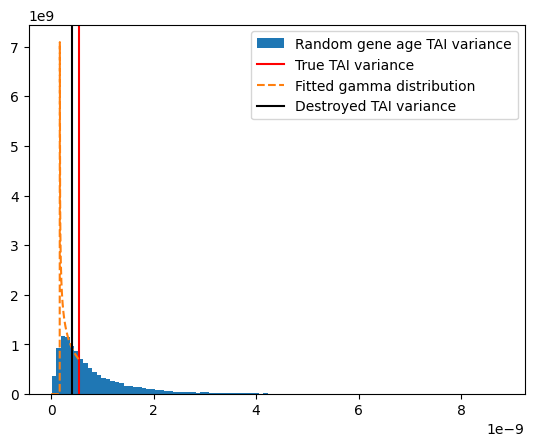

In [19]:
plt.hist(permutation_comp_vars, density=True, bins=100, label="Random gene age TAI variance")
plt.axvline(x=tai_var, label="True TAI variance", color="red")


x = np.linspace(0, tai_var, 200)
y = stats.gamma.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, y, label="Fitted gamma distribution", linestyle="dashed")
plt.axvline(x=new_tai_var, label="Destroyed TAI variance", color="black")
plt.legend()
plt.show()

### 3.3 Benchmark GA against greedy removal of genes with highest variance

In [20]:
gene_variances = expression_data.gene_variances.sort_values('Variance', ascending=False)
gene_variances

,Phylostratum,GeneID,Variance
9952,0.629125,at3g04290,351.166184
13457,0.629125,at3g54340,334.890561
11160,0.869090,at3g17010,292.661166
4886,0.805033,at1g68780,284.098520
2111,0.629125,at1g24260,269.499820
...,...,...,...
1635,0.711680,at1g18790,0.000555
18074,0.629125,at5g04380,0.000530
14972,0.629125,at4g10200,0.000508
1932,0.822370,at1g22230,0.000465


In [21]:
k_top = len(ga_genes)

highest_var_genes = gene_variances.head(k_top)['GeneID'].to_numpy()

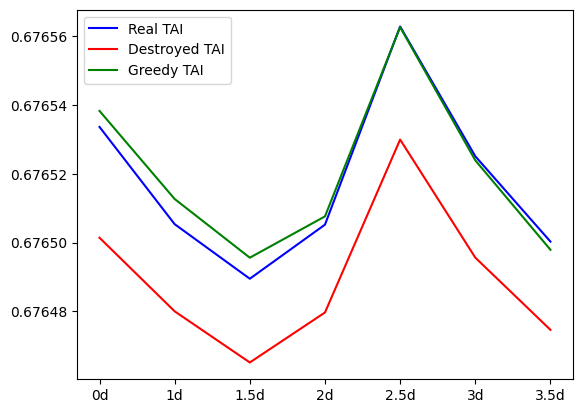

In [22]:
greedy_data = expression_data.remove_genes(highest_var_genes)
plt.plot(expression_data.tai, label="Real TAI", color="blue")
plt.plot(new_data.tai, label="Destroyed TAI", color="red")
plt.plot(greedy_data.tai, label="Greedy TAI", color="green")

plt.legend()
plt.show()

In [23]:
greedy_tai_var = np.var(greedy_data.tai).item()
print("p-value: ", get_p_value(greedy_tai_var))

p-value:  0.5391895797816353


Conversely, however, the genes that were extracted by GATAI tend to have a high variance (but they need to be carefully selected, it's not as simple as picking the most variant ones, hence the need for the GA approach)

In [24]:
common_genes = np.intersect1d(ga_genes, highest_var_genes)

print("Number of GA selected genes which are also part of the top_k most variant subset of genes in the dataset:", len(common_genes), "out of", len(ga_genes))

Number of GA selected genes which are also part of the top_k most variant subset of genes in the dataset: 0 out of 5
